In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


symbol = "GOOGL"
start_date = "2010-01-01"
end_date = "2020-12-31"

data = yf.download(symbol, start=start_date, end=end_date)

data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

print(len(data))
n_steps = 30
X, y = [], []
for i in range(len(data) - n_steps):
    X.append(data.values[i:i + n_steps])
    y.append(data.values[i + n_steps])

X, y = np.array(X), np.array(y)
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%%**********************]  1 of 1 completed

2768
(2738, 30, 1) (2738, 1)



<ipython-input-2-d94c06206e09>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [3]:
X_train.shape

(2190, 30, 1)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, activation='tanh', input_shape=(X_train.shape[1:])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
69/69 [==============================] - 2s 8ms/step - loss: 0.0133
Epoch 2/10
69/69 [==============================] - 1s 10ms/step - loss: 2.2184e-04
Epoch 3/10
69/69 [==============================] - 1s 11ms/step - loss: 1.5274e-04
Epoch 4/10
69/69 [==============================] - 1s 14ms/step - loss: 1.4619e-04
Epoch 5/10
69/69 [==============================] - 1s 13ms/step - loss: 1.4351e-04
Epoch 6/10
69/69 [==============================] - 1s 17ms/step - loss: 1.3842e-04
Epoch 7/10
69/69 [==============================] - 1s 13ms/step - loss: 1.3673e-04
Epoch 8/10
69/69 [==============================] - 1s 11ms/step - loss: 1.3348e-04
Epoch 9/10
69/69 [==============================] - 1s 9ms/step - loss: 1.2921e-04
Epoch 10/10
69/69 [==============================] - 1s 8ms/step - loss: 1.2726e-04


18/18 [==============================] - 0s 4ms/step


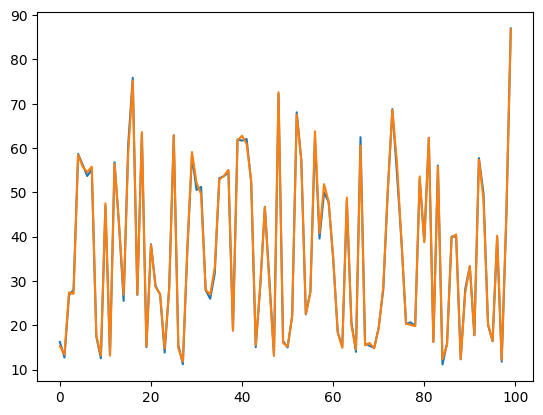

In [6]:
plt.plot(scaler.inverse_transform(model.predict(X_test)[:100]))
plt.plot(scaler.inverse_transform(y_test[:100]))

In [7]:
y_pred=scaler.inverse_transform(model.predict(X_test)[:100])
print(y_pred,y_test)

18/18 [==============================] - 0s 4ms/step
[[16.218275 ]
 [12.709849 ]
 [26.762684 ]
 [27.991783 ]
 [58.664127 ]
 [56.218975 ]
 [53.698353 ]
 [55.136356 ]
 [17.42742  ]
 [12.539968 ]
 [46.974857 ]
 [13.255836 ]
 [56.793964 ]
 [42.45143  ]
 [25.488686 ]
 [60.745544 ]
 [75.87055  ]
 [26.848083 ]
 [63.20591  ]
 [15.047885 ]
 [38.293316 ]
 [28.861774 ]
 [26.9535   ]
 [13.8316145]
 [28.614641 ]
 [62.84064  ]
 [15.519406 ]
 [11.193615 ]
 [37.33619  ]
 [58.359116 ]
 [50.5475   ]
 [51.23225  ]
 [27.941353 ]
 [25.97373  ]
 [31.709816 ]
 [53.192505 ]
 [53.639706 ]
 [54.530113 ]
 [18.820963 ]
 [61.94178  ]
 [61.67823  ]
 [62.04611  ]
 [52.229588 ]
 [15.046132 ]
 [28.925503 ]
 [46.74533  ]
 [30.140333 ]
 [13.337126 ]
 [72.22611  ]
 [16.40382  ]
 [14.966334 ]
 [22.163101 ]
 [68.05894  ]
 [57.371857 ]
 [22.438316 ]
 [27.593706 ]
 [62.365986 ]
 [39.554863 ]
 [49.960613 ]
 [47.872467 ]
 [35.07692  ]
 [18.43249  ]
 [15.149973 ]
 [47.955563 ]
 [20.727432 ]
 [13.991528 ]
 [62.447826 ]
 [15.8804

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming your model, scaler, and test data are prepared

y_pred = model.predict(X_test)[:100]
y_test = y_test[:100]  # Truncate target values to match predictions

# Check if scaling was applied during training
if hasattr(scaler, 'inverse_transform'):
  y_pred = scaler.inverse_transform(y_pred)

# Calculate accuracy metrics (replace with your desired metric)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"MSE: {mse:.2f}")  # Formatted to 2 decimal places
print(f"MAE: {mae:.2f}")
# Optionally, print predictions and targets for further analysis
# print(y_pred, y_test)


18/18 [==============================] - 0s 6ms/step
MSE: 1669.00
MAE: 36.27
